In [18]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv('../../data/varios/titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [21]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


VALORES FALTANTES

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
print(df['Age'].mean())
print(df['Age'].median())

30.272590361445783
27.0


In [24]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [25]:
df['Cabin'].fillna('Other', inplace=True)

In [26]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

VALORES ATIPICOS (OUTLIERS)

In [28]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Other,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Other,S


<Axes: >

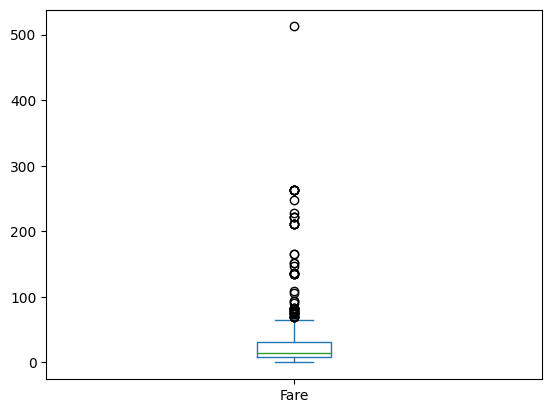

In [29]:
df['Fare'].plot(kind='box')

In [30]:
# Primer cuartil (cuartil 25)
Q1 = df['Fare'].quantile(0.25) # 7.89
# Tercer cuartil (cuartil 75)
Q3 = df['Fare'].quantile(0.75) # 31.47
# Rango intercuartílico (IQR): medida de dispersión, determina el 50% central
IQR = Q3 - Q1
IQR

23.576075

In [31]:
# filtro para quedarnos con datos que no son outliers
# Inferior: se considera outlier si está por debajo de Q1 - 1.5 * IQR
# Superior: se considera outlier si está por encima de Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
filter = (df['Fare'] >= limite_inferior) & (df['Fare'] <= limite_superior)

In [32]:
df_no_outlier = df.loc[filter]
print(df.shape) # 418
print(df_no_outlier.shape) # 363

(418, 12)
(363, 12)


<Axes: >

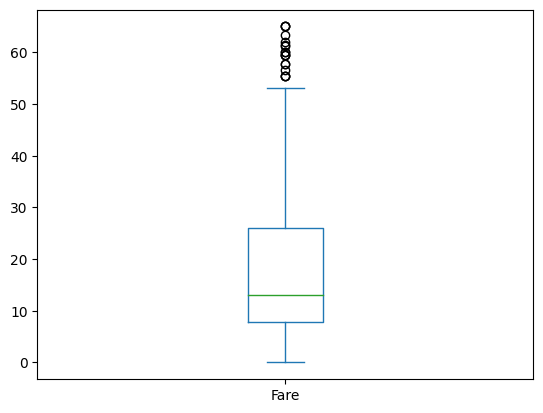

In [33]:
df_no_outlier['Fare'].plot(kind='box')

AGRUPACION
